In [297]:
import scipy.special as sc_sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [298]:
# Load train dataset
with open('../data/mnist/demo/mnist_train_100.csv', 'r') as f_train:
    train_data = [line.rstrip() for line in f_train]

In [299]:
image_2 = train_data[1].split(',')
print(np.asfarray(image_2[1:]))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

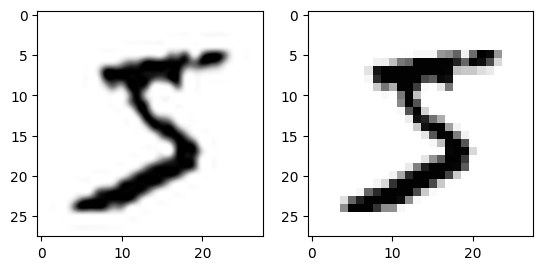

In [300]:
# values = list(map(int, lines[0].split(',')))
all_values = train_data[0].split(',')

# np.asfarray: str values -> int values in array
image_array_1 = np.asfarray(all_values[1:]).reshape((28, -1))

# plt.imshow -> value => color of pixel
figure, axis = plt.subplots(1, 2)
axis[0].imshow(image_array_1, cmap='Greys', interpolation='lanczos')
axis[1].imshow(image_array_1, cmap='Greys', interpolation=None)
plt.show()

In [301]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [302]:
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [303]:
# Example. Assignment of best score for marker.
onodes = 10
targets = np.zeros(onodes) + 0.01

# all_values[0] = 5 -> targets[5] = 0.01, change on 0.99 => target[5] = 0.99; best score for 5
targets[int(all_values[0])] = 0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [304]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes

        self.lr = learning_rate

        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        self.activation = lambda x: sc_sp.expit(x)

        pass

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        print('who', self.who.T)
        print('output_errors', output_errors)

        self.who += self.lr * np.dot(output_errors * final_outputs * (1.0 - final_outputs), hidden_outputs.T)
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), inputs.T)

        pass

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)

        return final_outputs

In [305]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

In [306]:
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [307]:
for record in train_data:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01

    targets[int(all_values[0])] = 0.99

    n.train(inputs, targets)  # !!!

    pass

who [[ 3.61228707e-01 -2.83923438e-01  2.87612780e-01  4.12614717e-01
  -1.82119381e-01  1.63805155e-01  7.44708955e-02  7.23371079e-01
   5.57361827e-01  1.47315731e-01]
 [-2.80225067e-01 -3.01917970e-01  3.87412254e-01  8.22309744e-02
  -1.09908670e-02  1.81729256e-01  5.41694197e-01  3.14039921e-01
   8.78196235e-02 -1.75171441e-02]
 [-6.25766796e-02  1.46048552e-01  1.29120225e-01 -1.04303385e-01
  -2.06299288e-01  1.01674199e-01  1.59537866e-02 -8.96658140e-02
  -4.69288915e-01  1.29738802e-01]
 [ 2.95718533e-01  3.07565714e-01 -2.75049533e-01  8.54577219e-02
  -1.49719778e-01 -1.60347118e-02  5.84214014e-02  5.75122751e-01
  -1.33858500e-01 -1.80624983e-01]
 [-1.14341525e-01  2.24667960e-01 -5.61315207e-02 -1.69332027e-01
  -1.48312244e-01 -5.57144995e-01  7.75431196e-02  2.39536443e-01
   1.90026934e-01 -4.13527134e-01]
 [-1.26336499e-01 -2.85355850e-01  2.46132987e-02 -3.82594106e-01
  -1.39313101e-01 -2.91790565e-01  1.25719587e-01 -6.69963150e-02
  -2.35587820e-01 -4.36540868

In [308]:
# Load test dataset

with open('../data/mnist/demo/mnist_test_10.csv', 'r') as f_test:
    test_data = [test.rstrip() for test in f_test]

In [309]:
all_values = test_data[0].split(',')
print(all_values)

['7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

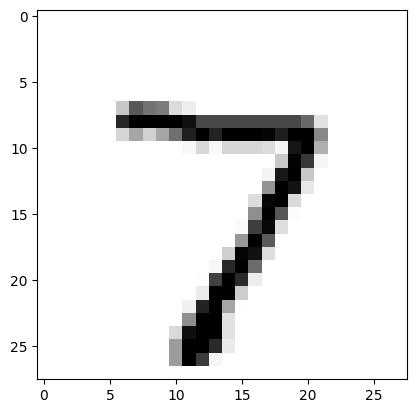

In [310]:
image_array = np.asfarray(all_values[1:]).reshape(28, -1)
plt.imshow(image_array, cmap='Greys', interpolation=None)
plt.show()

In [311]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.02198165],
       [0.00910961],
       [0.03735788],
       [0.12819294],
       [0.05196073],
       [0.02681074],
       [0.0136241 ],
       [0.87802327],
       [0.0195645 ],
       [0.0337134 ]])

In [312]:
# Testing of NeuralNetwork

# logs
scorecard = []

for record in test_data:
    all_values = record.split(',')

    # True marker
    correct_label = int(all_values[0])
    print('True marker:', correct_label)

    # Scaling values
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # Network survey
    outputs = n.query(inputs)

    # Max value
    label = np.argmax(outputs)
    print('outputs:', outputs)
    print('Response of NN:', label)

    # Add in scorecard
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

    pass

True marker: 7
outputs: [[0.02198165]
 [0.00910961]
 [0.03735788]
 [0.12819294]
 [0.05196073]
 [0.02681074]
 [0.0136241 ]
 [0.87802327]
 [0.0195645 ]
 [0.0337134 ]]
Response of NN: 7
True marker: 2
outputs: [[0.37947389]
 [0.03077563]
 [0.07415316]
 [0.17157865]
 [0.00398288]
 [0.01923047]
 [0.24133385]
 [0.00949337]
 [0.05681531]
 [0.00287514]]
Response of NN: 0
True marker: 1
outputs: [[0.01185418]
 [0.9065101 ]
 [0.01240512]
 [0.13281937]
 [0.00479409]
 [0.05469048]
 [0.06246382]
 [0.02047298]
 [0.04845111]
 [0.0034271 ]]
Response of NN: 1
True marker: 0
outputs: [[0.79911362]
 [0.00822174]
 [0.03469255]
 [0.02425613]
 [0.03111837]
 [0.00493865]
 [0.07629046]
 [0.12443985]
 [0.00445659]
 [0.00129147]]
Response of NN: 0
True marker: 4
outputs: [[0.03046347]
 [0.00338063]
 [0.06211967]
 [0.05987847]
 [0.91112709]
 [0.04385501]
 [0.01733524]
 [0.41703721]
 [0.07228052]
 [0.01253381]]
Response of NN: 4
True marker: 1
outputs: [[0.008121  ]
 [0.93079702]
 [0.00759231]
 [0.10228848]
 [0.0

In [313]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [314]:
# Transformation in numpy array
scorecard_array = np.asarray(scorecard)
scorecard_array

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [315]:
print('Effectiveness:', scorecard_array.sum() / scorecard_array.size)

Effectiveness: 0.6
